In [1]:
import csv
import time
import random
import requests
from lxml import etree
import pandas as pd

In [2]:
yelp =pd.read_csv('yelp.csv')

In [3]:
recommend_reviews = yelp[yelp['fake'] == 0]
non_recommend_reviews = yelp[yelp['fake'] == 1]

In [4]:
table = recommend_reviews.head()
display(table)

,Unnamed: 0,city,restaurant,rank,point,review_n,username,location,has_profile,friend,...,compound,positive,negative,neutral,word_count,sentence_length,adj_POS,I_pronoun,past_tense,rating_dev
0,0,Alameda,Jong Ga House,236,4.0,2300.0,Ernesto B.,"Oakland, CA",0.0,0.0,...,0.9618,0.583,0.000,0.417,20,4,0.200000,0.000000,0.000000,0.843328
1,1,Alameda,Jong Ga House,236,4.0,2300.0,Katrina F.,"San Francisco, CA",1.0,914.0,...,0.9889,0.141,0.056,0.803,364,17,0.076923,0.016484,0.035714,0.843328
2,2,Alameda,Jong Ga House,236,4.0,2300.0,Mario V.,"San Francisco, CA",1.0,86.0,...,0.9059,0.074,0.053,0.874,544,46,0.082721,0.022059,0.031250,-2.529983
3,3,Alameda,Jong Ga House,236,4.0,2300.0,Giselle A.,"Martinez, CA",1.0,240.0,...,0.9716,0.224,0.018,0.758,98,9,0.132653,0.030612,0.000000,0.843328
4,4,Alameda,Jong Ga House,236,4.0,2300.0,Seth E.,"Dublin, CA",1.0,249.0,...,0.7708,0.075,0.051,0.874,178,11,0.078652,0.005618,0.028090,0.000000


In [62]:
table = non_recommend_reviews.describe()
display(table)

,Unnamed: 0,rank,point,review_n,has_profile,friend,review,photo,rating,fake,...,compound,positive,negative,neutral,word_count,sentence_length,adj_POS,I_pronoun,past_tense,rating_dev
count,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.0,...,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000,48305.000000
mean,243506.641134,130.819315,4.029475,4081.848359,0.536363,37.130877,21.091398,22.695166,4.196646,1.0,...,0.651658,0.307318,0.031329,0.661311,47.452272,4.745761,0.131023,0.032103,0.017098,0.111294
std,138363.425117,81.524718,0.361644,5555.874918,0.498681,143.055968,78.336363,852.022733,1.265996,0.0,...,0.460004,0.196455,0.071298,0.181697,66.402841,6.101936,0.100935,0.041956,0.029087,0.916293
min,1998.000000,8.000000,1.600000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,...,-0.998200,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-8.633333
25%,118901.000000,31.000000,3.900000,787.000000,0.000000,0.000000,2.000000,0.000000,4.000000,1.0,...,0.608900,0.164000,0.000000,0.554000,14.000000,2.000000,0.073733,0.000000,0.000000,-0.093015
50%,235176.000000,162.000000,4.100000,1700.000000,1.000000,0.000000,5.000000,0.000000,5.000000,1.0,...,0.851300,0.288000,0.000000,0.684000,25.000000,3.000000,0.111111,0.016393,0.000000,0.557451
75%,360276.000000,200.000000,4.300000,4100.000000,1.000000,10.000000,14.000000,2.000000,5.000000,1.0,...,0.940600,0.429000,0.036000,0.788000,57.000000,6.000000,0.166667,0.054545,0.029412,0.693504
max,486755.000000,239.000000,5.000000,18400.000000,1.000000,4999.000000,5915.000000,113799.000000,5.000000,1.0,...,0.999800,1.000000,1.000000,1.000000,1250.000000,431.000000,1.000000,1.000000,0.500000,2.461017


In [6]:
 non_recommend_reviews.shape

(48305, 27)

In [7]:
import pandas as pd

# 1. 按照 'city' 和 'restaurant' 划分成不同的组，计算每个组中的个体数量
grouped_df =  non_recommend_reviews.groupby(['city', 'restaurant']).size().reset_index(name='count')

In [8]:
counts = non_recommend_reviews[non_recommend_reviews['rating'] == 1].value_counts(subset=['city', 'restaurant']).reset_index(name='1_point_non')
counts_1 = non_recommend_reviews[non_recommend_reviews['rating'] == 5].value_counts(subset=['city', 'restaurant']).reset_index(name='5_point_non')

# 将结果合并到原始的grouped_df中
grouped_df = pd.merge(grouped_df, counts, on=['city', 'restaurant'], how='left').fillna(0)
grouped_df = pd.merge(grouped_df, counts_1, on=['city', 'restaurant'], how='left').fillna(0)


In [9]:
grouped_df['percent_ne_non'] = grouped_df['1_point_non'] / grouped_df['count']
grouped_df['percent_po_non'] = grouped_df['5_point_non'] / grouped_df['count']

In [38]:
selected_rows = grouped_df[grouped_df['restaurant'] == 'CoCo Ichibanya']

# 打印筛选后的结果
print(selected_rows)

         city      restaurant  count  1_point_non  5_point_non  \
654  Torrance  CoCo Ichibanya    100          5.0         48.0   

     percent_ne_non  percent_po_non  
654            0.05            0.48  


In [12]:
table = grouped_df.head()
display(table)

,city,restaurant,count,1_point_non,5_point_non,percent_ne_non,percent_po_non
0,Alameda,Aman Cafe,4,0.0,4.0,0.000000,1.000000
1,Alameda,Brendas Oakland,39,3.0,27.0,0.076923,0.692308
2,Alameda,Cholita Linda,30,2.0,19.0,0.066667,0.633333
3,Alameda,Cinema Grill,14,3.0,8.0,0.214286,0.571429
4,Alameda,East End,48,6.0,29.0,0.125000,0.604167


In [13]:
description = grouped_df.describe()
display(description)

,count,1_point_non,5_point_non,percent_ne_non,percent_po_non
count,709.000000,709.000000,709.000000,709.000000,709.000000
mean,68.131171,6.155148,41.380818,0.134664,0.612833
std,201.720414,10.554736,120.404997,0.138311,0.198611
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.000000,7.000000,0.036364,0.483333
50%,29.000000,3.000000,16.000000,0.099010,0.600000
75%,64.000000,8.000000,38.000000,0.200000,0.750000
max,3919.000000,138.000000,2133.000000,1.000000,1.000000


# recommend

In [14]:
grouped_df_1 =  recommend_reviews.groupby(['city', 'restaurant']).size().reset_index(name='count')

In [15]:
counts = recommend_reviews[recommend_reviews['rating'] == 1].value_counts(subset=['city', 'restaurant']).reset_index(name='1_point_re')
counts_1 = recommend_reviews[recommend_reviews['rating'] == 5].value_counts(subset=['city', 'restaurant']).reset_index(name='5_point_re')
# 将结果合并到原始的grouped_df中
grouped_df_1 = pd.merge(grouped_df_1, counts, on=['city', 'restaurant'], how='left').fillna(0)
grouped_df_1 = pd.merge(grouped_df_1, counts_1, on=['city', 'restaurant'], how='left').fillna(0)

In [16]:
grouped_df_1['percent_ne_re'] = grouped_df_1['1_point_re'] / grouped_df_1['count']
grouped_df_1['percent_po_re'] = grouped_df_1['5_point_re'] / grouped_df_1['count']

In [64]:
table = recommend_reviews.describe()
display(table)

,Unnamed: 0,rank,point,review_n,has_profile,friend,review,photo,rating,fake,...,compound,positive,negative,neutral,word_count,sentence_length,adj_POS,I_pronoun,past_tense,rating_dev
count,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.0,...,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000,438451.000000
mean,243363.272270,145.171864,4.032106,2811.376252,0.745525,123.559342,136.218966,272.273723,4.014912,0.0,...,0.738603,0.215108,0.034790,0.750101,101.537513,8.545546,0.111833,0.033428,0.023629,-0.012153
std,140749.624014,76.441200,0.365069,4206.802325,0.435566,311.556864,418.632514,2218.615652,1.239967,0.0,...,0.453208,0.117195,0.046913,0.106388,95.658951,7.505872,0.049092,0.029371,0.021865,0.872387
min,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-0.998700,0.000000,0.000000,0.093000,1.000000,1.000000,0.000000,0.000000,0.000000,-23.522727
25%,121900.500000,52.000000,3.900000,682.000000,0.000000,0.000000,10.000000,0.000000,3.000000,0.0,...,0.778300,0.132000,0.000000,0.692000,38.000000,4.000000,0.080000,0.007519,0.000000,-0.425481
50%,244051.000000,172.000000,4.100000,1400.000000,1.000000,19.000000,33.000000,6.000000,4.000000,0.0,...,0.929900,0.200000,0.020000,0.765000,71.000000,6.000000,0.105263,0.029851,0.021552,0.271341
75%,366513.500000,202.000000,4.300000,2800.000000,1.000000,128.000000,115.000000,55.000000,5.000000,0.0,...,0.974400,0.282000,0.052000,0.824000,131.000000,11.000000,0.135135,0.050955,0.037037,0.638609
max,486751.000000,239.000000,5.000000,18400.000000,1.000000,5000.000000,20415.000000,157513.000000,5.000000,0.0,...,0.999800,0.907000,0.750000,1.000000,1728.000000,293.000000,1.000000,0.277778,0.456522,4.128571


In [39]:
selected_rows = grouped_df_1[grouped_df_1['restaurant'] == 'CoCo Ichibanya']

# 打印筛选后的结果
print(selected_rows)

         city      restaurant  count  1_point_re  5_point_re  percent_ne_re  \
691  Torrance  CoCo Ichibanya   1369        92.0       552.0       0.067202   

     percent_po_re  
691       0.403214  


In [19]:
description = grouped_df_1.describe()
display(description)

,count,1_point_re,5_point_re,percent_ne_re,percent_po_re
count,749.000000,749.000000,749.000000,749.000000,749.000000
mean,585.381842,43.102804,284.849132,0.090098,0.510476
std,1022.692495,71.277786,481.692343,0.097700,0.171933
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,8.000000,57.000000,0.039755,0.401606
50%,305.000000,21.000000,150.000000,0.064220,0.502347
75%,676.000000,48.000000,334.000000,0.108696,0.631661
max,15166.000000,900.000000,6146.000000,1.000000,1.000000


In [20]:
review_count =pd.read_csv('reviews_info.csv')

In [43]:
new_row = {'city': 'Torrance', 'restaurant': 'CoCo Ichibanya', 'review_count': 1635, 'fake_review_count': 106, 'percent': 0.060885}

# 使用 append 添加新行
review_count = review_count.append(new_row, ignore_index=True)

C:\Users\10047\AppData\Local\Temp\ipykernel_1112\3194644356.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  review_count = review_count.append(new_row, ignore_index=True)


In [44]:
table = review_count.head()
display(table)

,city,restaurant,review_count,fake_review_count,percent
0,Alameda,Jong Ga House,2325,125,0.051020
1,Alameda,Brendas Oakland,1064,41,0.037104
2,Alameda,Homeroom,6486,821,0.112358
3,Alameda,Yojimbo,1673,66,0.037953
4,Alameda,Quinns Lighthouse,1030,67,0.061076


In [45]:
selected_rows = review_count[review_count['restaurant'] == 'CoCo Ichibanya']

# 打印筛选后的结果
print(selected_rows)

         city      restaurant  review_count  fake_review_count   percent
749  Torrance  CoCo Ichibanya          1635                106  0.060885


In [46]:
import re
import html

def remove_non_ascii(text):
    # 先解码 HTML 实体编码，然后再去除非 ASCII 字符
    text = html.unescape(str(text))
    return re.sub(r'[^\x00-\x7F]+', '', text)

# 在应用函数之前，确保 'text' 列中的所有值都是字符串
review_count['restaurant'] = review_count['restaurant'].apply(remove_non_ascii)
grouped_df['restaurant'] = grouped_df['restaurant'].apply(remove_non_ascii)
grouped_df_1['restaurant'] = grouped_df_1['restaurant'].apply(remove_non_ascii)

In [47]:
# 合并 review_count 数据集
merged_df = review_count.merge(grouped_df, on=['city', 'restaurant'], how='left', suffixes=('_review', '_fake'))
merged_df = merged_df.merge(grouped_df_1, on=['city', 'restaurant'], how='left', suffixes=('_fake', '_non'))

# 将空缺值填充为 0
merged_df = merged_df.fillna(0)

In [48]:
table = merged_df.head()
display(table)

,city,restaurant,review_count,fake_review_count,percent,count_fake,1_point_non,5_point_non,percent_ne_non,percent_po_non,count_non,1_point_re,5_point_re,percent_ne_re,percent_po_re
0,Alameda,Jong Ga House,2325,125,0.051020,123.0,2.0,75.0,0.016260,0.609756,1998.0,91.0,867.0,0.045546,0.433934
1,Alameda,Brendas Oakland,1064,41,0.037104,39.0,3.0,27.0,0.076923,0.692308,786.0,86.0,358.0,0.109415,0.455471
2,Alameda,Homeroom,6486,821,0.112358,821.0,27.0,481.0,0.032887,0.585871,5814.0,258.0,2546.0,0.044376,0.437908
3,Alameda,Yojimbo,1673,66,0.037953,65.0,6.0,40.0,0.092308,0.615385,1390.0,128.0,544.0,0.092086,0.391367
4,Alameda,Quinns Lighthouse,1030,67,0.061076,65.0,15.0,29.0,0.230769,0.446154,897.0,115.0,231.0,0.128205,0.257525


In [49]:
variables_to_drop = ['1_point_non', '5_point_non','1_point_re', '5_point_re']

# 使用 drop 方法删除指定的变量
merged_df = merged_df.drop(variables_to_drop, axis=1)

In [50]:
variables_to_drop = ['count_fake', 'count_non']

# 使用 drop 方法删除指定的变量
merged_df = merged_df.drop(variables_to_drop, axis=1)

In [51]:
df = yelp[['city','restaurant','point']]
df = df.drop_duplicates()

In [52]:
table = df.head()
display(table)

,city,restaurant,point
0,Alameda,Jong Ga House,4.0
2121,Alameda,Brendas Oakland,3.9
2946,Alameda,Homeroom,4.1
9581,Alameda,Yojimbo,3.9
11036,Alameda,Quinns Lighthouse,3.5


In [53]:
df.shape

(750, 3)

In [59]:
selected_rows = merged_df[merged_df['restaurant'] == 'CoCo Ichibanya']

# 打印筛选后的结果
print(selected_rows['point'])

749    3.9
Name: point, dtype: float64


In [57]:
merged_df = merged_df.merge(df, on=['city', 'restaurant'], how='left')
merged_df = merged_df.fillna(1)

In [58]:
description = merged_df.describe()
display(description)

,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,728.028000,65.588000,0.072025,0.127302,0.579332,0.089978,0.509796,4.003600
std,1221.013614,210.216087,0.049926,0.137917,0.238163,0.097690,0.172827,0.505431
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,167.000000,10.000000,0.044444,0.023955,0.456512,0.039701,0.400763,3.800000
50%,398.000000,26.000000,0.063219,0.090909,0.591229,0.064110,0.501859,4.100000
75%,847.000000,62.000000,0.087279,0.186342,0.737395,0.108675,0.631243,4.300000
max,18556.000000,4389.000000,0.500000,1.000000,1.000000,1.000000,1.000000,5.000000


In [60]:
merged_df.columns

Index(['city', 'restaurant', 'review_count', 'fake_review_count', 'percent',
       'percent_ne_non', 'percent_po_non', 'percent_ne_re', 'percent_po_re',
       'point'],
      dtype='object')

Series([], Name: point, dtype: float64)


In [61]:
merged_df.to_csv('merged_df.csv', index=False)

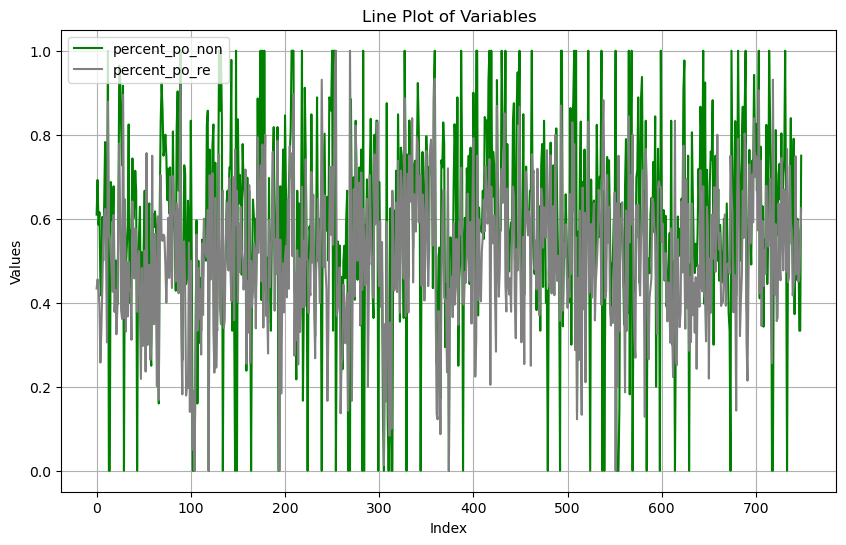

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'your_data_frame' with the actual DataFrame containing your dataset
# Example: df = pd.read_csv('your_dataset.csv')
# Assuming your DataFrame has columns 'percent', 'percent_ne_non', 'percent_po_non', 'percent_ne_re', 'percent_po_re'
# Replace the column names accordingly if they are different in your dataset
df = merged_df

# Create a line plot with different colors for each variable
plt.figure(figsize=(10, 6))

#plt.plot(df['percent'], label='percent', color='red')
#plt.plot(df['percent_ne_non'], label='percent_ne_non', color='blue')
plt.plot(df['percent_po_non'], label='percent_po_non', color='green')
#plt.plot(df['percent_ne_re'], label='percent_ne_re', color='yellow')
plt.plot(df['percent_po_re'], label='percent_po_re', color='gray')

plt.title('Line Plot of Variables')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_data_frame' with the actual DataFrame containing your dataset
# Example: df = pd.read_csv('your_dataset.csv')

# Assume 'dependent_variable' is the column you want to predict, and 'independent_variable' is the predictor
X = merged_df[['percent', 'fake_review_count','percent_ne_non', 'percent_po_non', 'percent_ne_re', 'percent_po_re','point']]
y = merged_df['review_count']

# Create a linear regression model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     505.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          2.78e-277
Time:                        15:08:29   Log-Likelihood:                -5729.0
No. Observations:                 749   AIC:                         1.147e+04
Df Residuals:                     741   BIC:                         1.151e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -406.7476    502.92

In [67]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_data_frame' with the actual DataFrame containing your dataset
# Example: df = pd.read_csv('your_dataset.csv')

# Assume 'dependent_variable' is the column you want to predict, and 'independent_variable' is the predictor
X = merged_df[['percent', 'fake_review_count','percent_ne_non', 'percent_po_non', 'percent_ne_re', 'percent_po_re','review_count']]
y = merged_df['point']

# Create a linear regression model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  point   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1549.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:51:21   Log-Likelihood:                 477.95
No. Observations:                 749   AIC:                            -939.9
Df Residuals:                     741   BIC:                            -902.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.3703      0.02

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.DataFrame(merged_df)

# 根据条件创建四个组
group1 = df[(df['review_count'] < 100) & (df['point'] < 3.8)]
group2 = df[(df['review_count'] < 100) & (df['point'] > 4.3)]
group3 = df[(df['review_count'] > 844) & (df['point'] < 3.8)]
group4 = df[(df['review_count'] > 844) & (df['point'] > 4.0)]

# 输出每个组的描述统计信息
print("Group 1:")
display(group1.describe())
print("\nGroup 2:")
display(group2.describe())
print("\nGroup 3:")
display(group3.describe())
print("\nGroup 4:")
display(group4.describe())

#description = merged_df.describe()
#display(description)

Group 1:


,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point
count,42.000000,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,50.690476,4.97619,0.098957,0.267721,0.307660,0.312496,0.257867,2.914286
std,30.010151,4.42547,0.104029,0.295490,0.309935,0.238284,0.163976,0.801088
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,2.00000,0.030833,0.000000,0.000000,0.180070,0.140714,2.525000
50%,53.000000,3.50000,0.075347,0.236111,0.333333,0.218254,0.256777,3.250000
75%,74.500000,7.75000,0.132500,0.417582,0.500000,0.433630,0.375247,3.500000
max,97.000000,17.00000,0.500000,1.000000,1.000000,1.000000,0.750000,3.700000



Group 2:


,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,46.500000,3.340909,0.080465,0.005682,0.542080,0.022143,0.776956,4.636364
std,28.166036,3.161860,0.080203,0.037689,0.455415,0.028335,0.115057,0.173997
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,4.400000
25%,24.250000,1.000000,0.027500,0.000000,0.000000,0.000000,0.696195,4.500000
50%,43.000000,2.500000,0.060241,0.000000,0.708333,0.000000,0.765957,4.600000
75%,70.000000,4.000000,0.095819,0.000000,1.000000,0.044961,0.852509,4.800000
max,98.000000,15.000000,0.365854,0.250000,1.000000,0.101449,1.000000,5.000000



Group 3:


,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1486.952381,177.095238,0.089647,0.151910,0.470393,0.179234,0.278909,3.357143
std,653.806277,265.410984,0.085572,0.065163,0.134017,0.088537,0.082292,0.380225
min,890.000000,39.000000,0.039331,0.025087,0.343590,0.080099,0.122393,2.500000
25%,1120.000000,67.000000,0.057203,0.094203,0.402597,0.119469,0.253968,3.200000
50%,1312.000000,92.000000,0.067077,0.158730,0.424419,0.138850,0.283465,3.500000
75%,1562.000000,149.000000,0.089636,0.215116,0.490196,0.249084,0.341814,3.600000
max,3713.000000,1274.000000,0.449224,0.251701,0.831315,0.354191,0.395251,3.700000



Group 4:


,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2045.937500,210.291667,0.071790,0.061703,0.657862,0.045845,0.575498,4.273958
std,2122.694553,477.305814,0.030702,0.044398,0.115053,0.019487,0.093589,0.152346
min,848.000000,16.000000,0.017837,0.000000,0.372881,0.008172,0.370370,4.100000
25%,1096.500000,72.000000,0.053206,0.030303,0.569677,0.032624,0.497945,4.100000
50%,1400.000000,104.500000,0.067294,0.053702,0.650324,0.044528,0.582153,4.300000
75%,2297.750000,178.250000,0.081275,0.080000,0.738571,0.056038,0.636837,4.400000
max,18556.000000,4389.000000,0.191284,0.200000,0.888889,0.111111,0.761151,4.600000


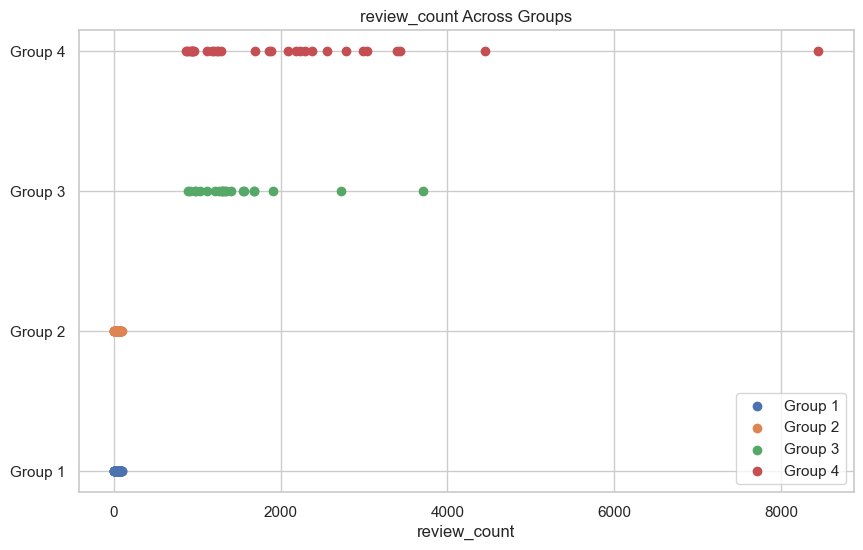

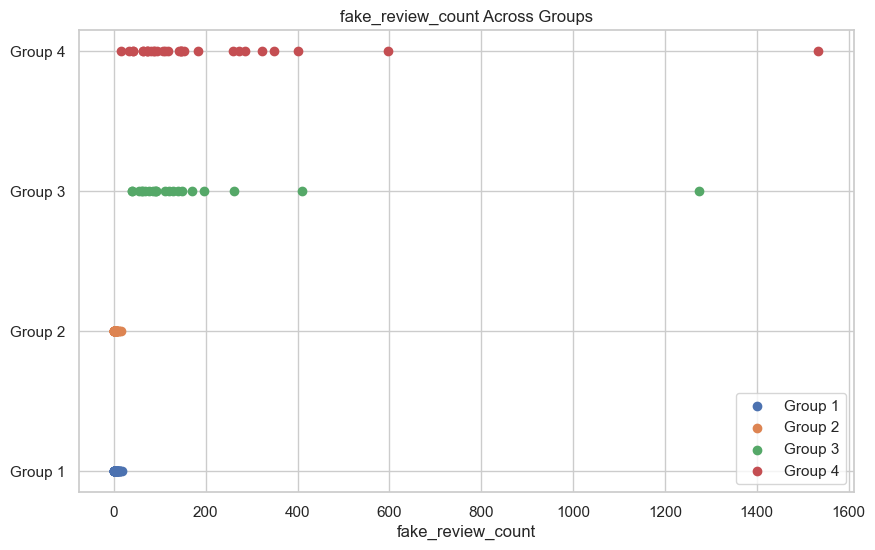

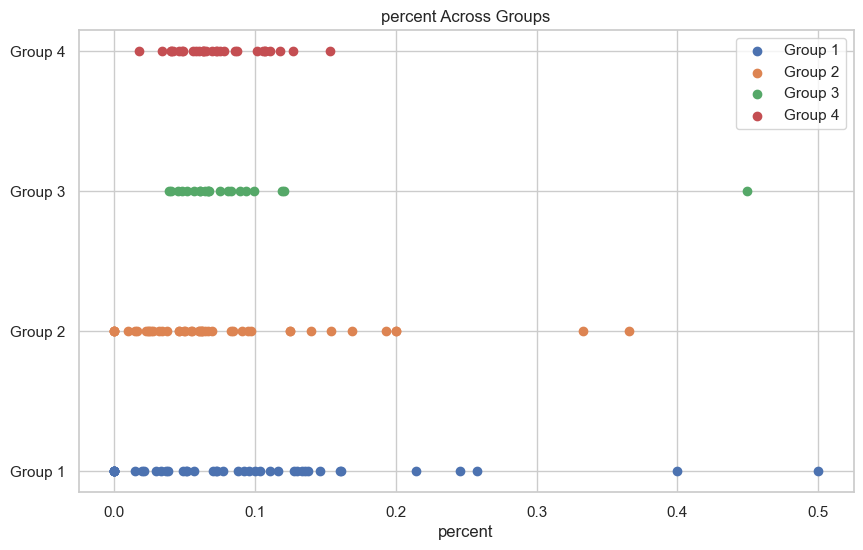

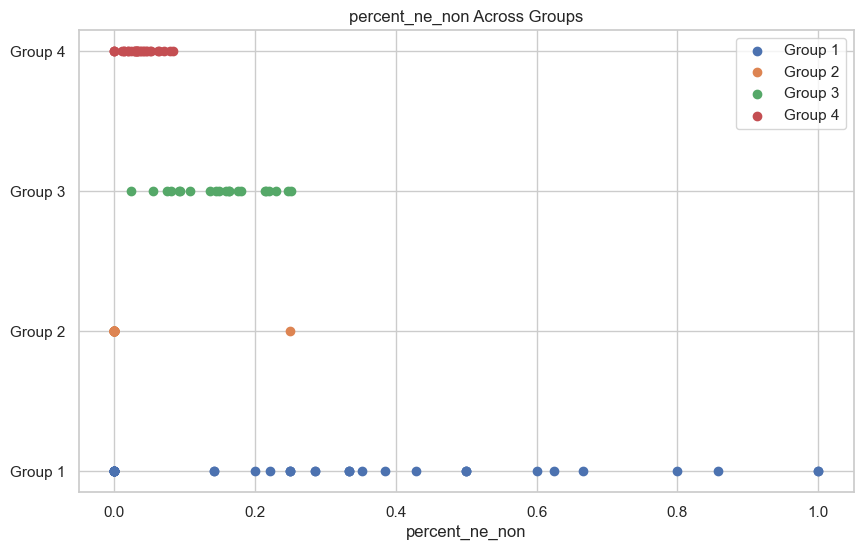

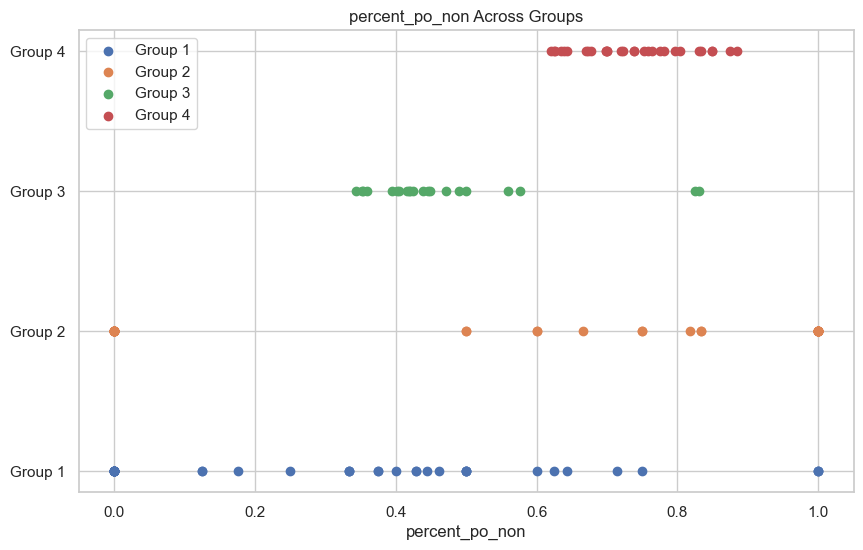

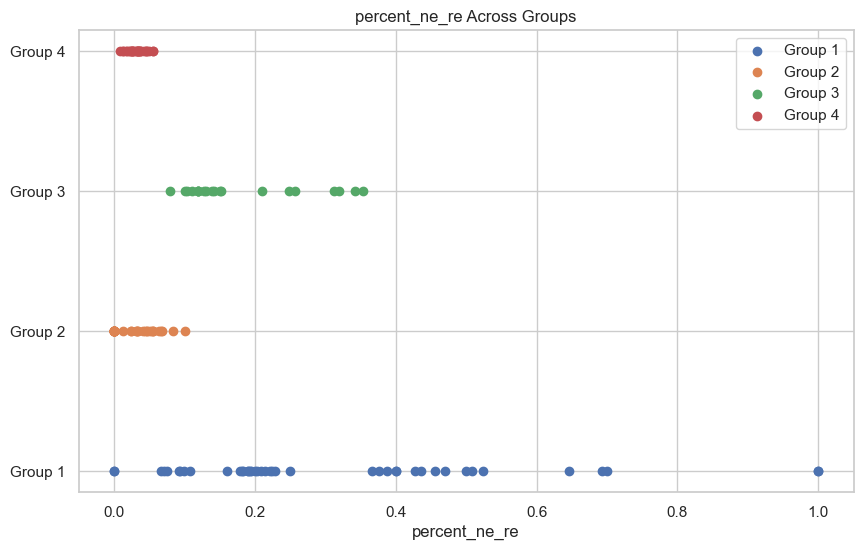

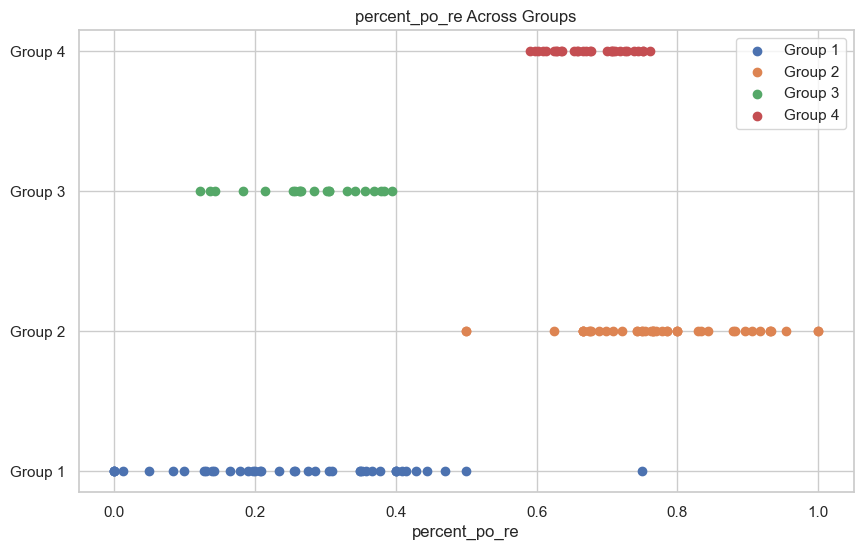

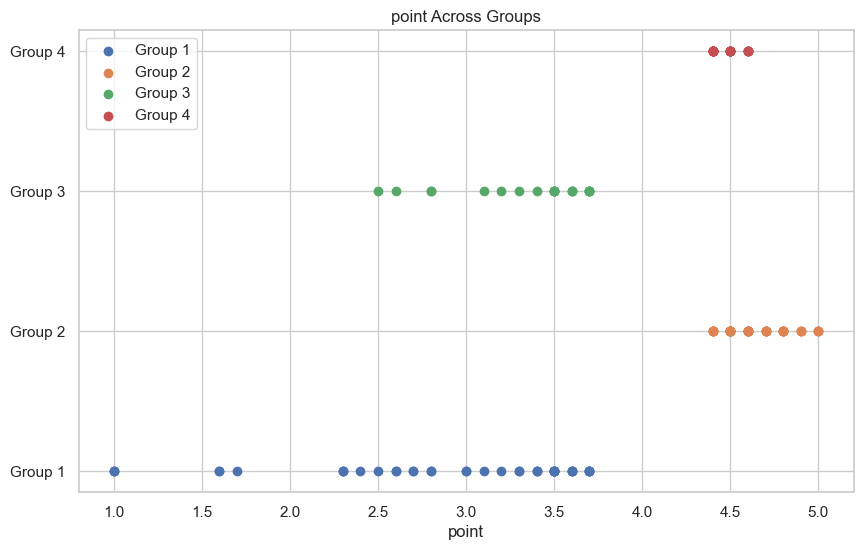

In [55]:
for feature in df.columns[2:]:
    plt.figure(figsize=(10, 6))
    plt.scatter(group1[feature], [1] * len(group1), label='Group 1', marker='o')
    plt.scatter(group2[feature], [2] * len(group2), label='Group 2', marker='o')
    plt.scatter(group3[feature], [3] * len(group3), label='Group 3', marker='o')
    plt.scatter(group4[feature], [4] * len(group4), label='Group 4', marker='o')

    plt.title(f'{feature} Across Groups')
    plt.xlabel(feature)
    plt.yticks([1, 2, 3, 4], ['Group 1', 'Group 2', 'Group 3', 'Group 4'])
    plt.legend()
    plt.show()

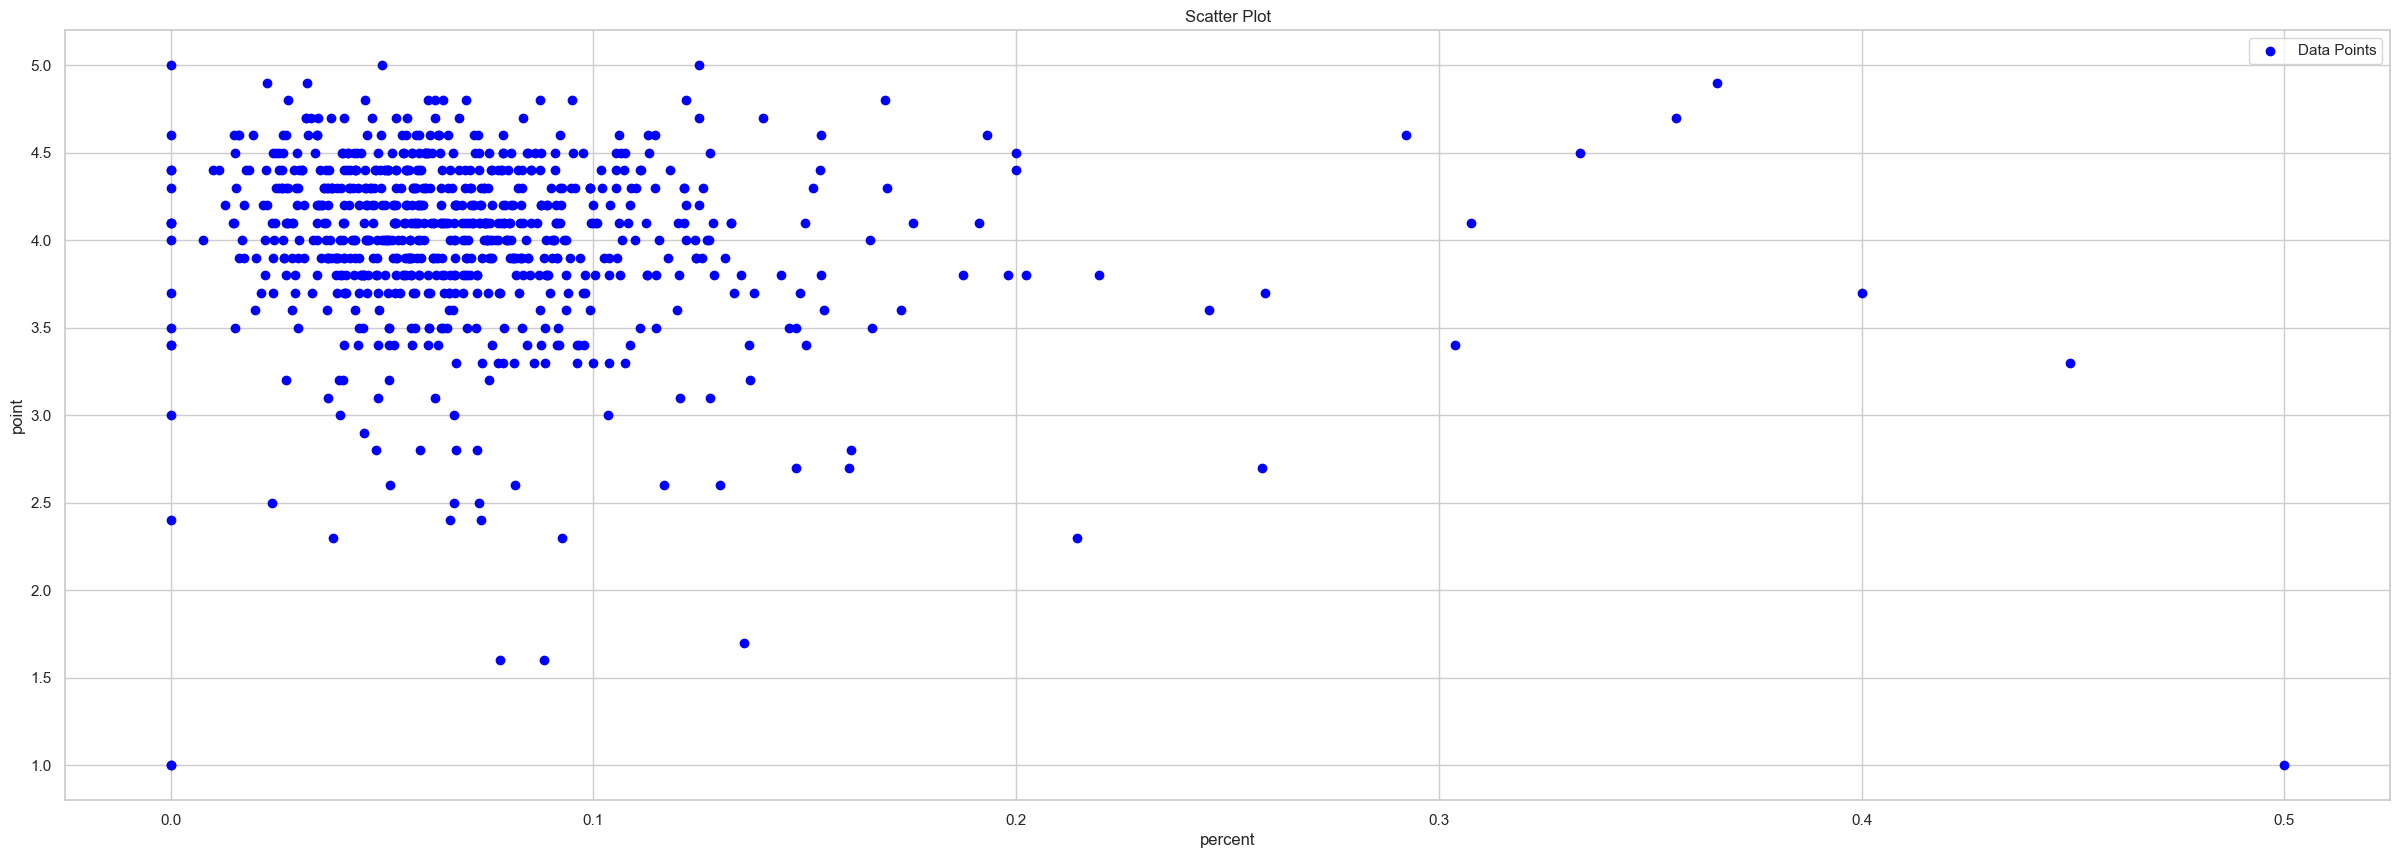

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(merged_df)

# 设置绘图风格（可选）
sns.set(style="whitegrid")

# 'review_count', 'fake_review_count', 'percent', 'percent_ne_non', 'percent_po_non', 'percent_ne_re', 'percent_po_re', 'point'
plt.figure(figsize=(30, 10))
plt.scatter(df['percent'], df['point'], c='blue', marker='o', label='Data Points')

# 添加标题和坐标轴标签
plt.title('Scatter Plot')
plt.xlabel('percent')
plt.ylabel('point')

# 添加图例
plt.legend()

# 显示图形
plt.show()